<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/skillspire_introtostats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This week we are going to begin with the basics and explore populations, parameters, and estimates.  We are going to learn how to take an accurate sample from a population and compare it to other populations.

# Data Generation Processes

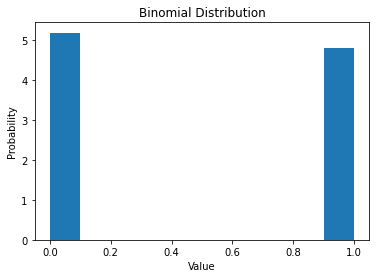

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import sqlite3
from ast import literal_eval

# !pip install ipython-sql

# Set the size of the binomial sample
n = 1000

# Generate a binomial sample
sample_binomial = np.random.binomial(1, .5, n)

# Plot a histogram of the sample
plt.hist(sample_binomial, density=True)

# Label the plot
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

In [ ]:
sample_binomial.mean()

0.481

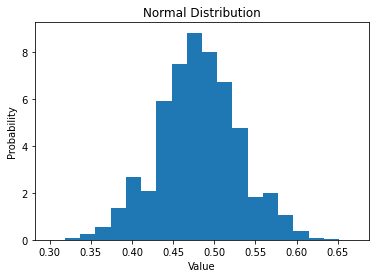

In [ ]:
# Generate a sample mean of the binomial sample 1000 times
sample_means = [np.mean(np.random.choice(sample_binomial, 100)) for _ in range(10000)]

# Plot a histogram of the sample
plt.hist(sample_means, density=True, bins=20)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

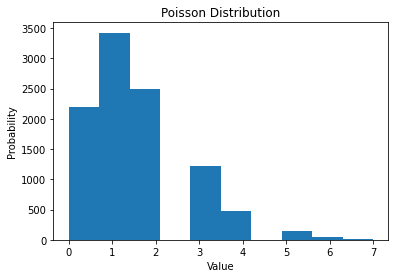

In [ ]:
# Poisson Example

# Set the number of samples
n = 10000

# Set the lambda parameter
lam = 1.5

# Generate a poisson sample
sample_poisson = np.random.poisson(lam, n)

# Plot a histogram of the sample
plt.hist(sample_poisson)

# Label the plot
plt.title('Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

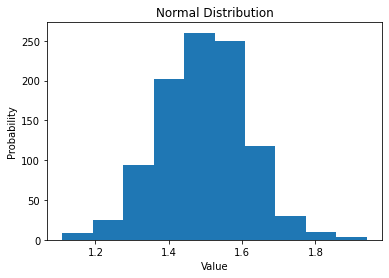

In [ ]:
# Generate a sample mean of the poisson sample 1000 times
sample_means = [np.mean(np.random.choice(sample_poisson, 100)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

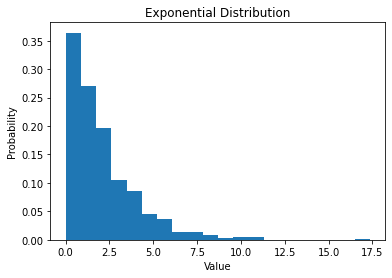

In [ ]:
# Exponentail Distributions

# Set the number of samples
n = 1000

# Set the rate parameter
rate = 0.5

# Generate an exponential sample
sample_exponential = np.random.exponential(1/rate, n)

# Plot a histogram of the sample
plt.hist(sample_exponential, density=True, bins=20)

# Label the plot
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

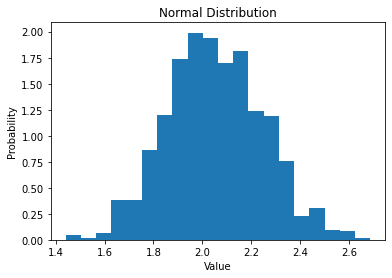

In [ ]:
# Generate a sample mean of the exponential sample 1000 times
sample_means = [np.mean(np.random.choice(sample_exponential, 100)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means, density=True, bins=20)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

Let's discuss the common distributions we see in the data we work with every day.  How does the data generation process impact how you would analyze this data ? Is mean the appropriate model ? 

Text(0.5, 1.0, 'Normal Distribution')

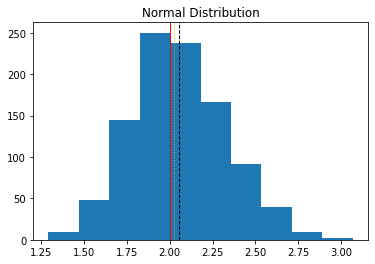

In [ ]:
# Generate a sample mean of the exponential sample 1000 times
sample_means = [np.mean(np.random.choice(sample_exponential, 50)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means)

# Add vertical lines to mark the mean, median and rate parameter
plt.axvline(np.mean(sample_means), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(sample_means), color='y', linestyle='dotted', linewidth=1)
plt.axvline(1/rate, color='r', linestyle='solid', linewidth=1)

# Label the plot
plt.title('Normal Distribution')

Sample Mean: 0.56
Theoretical Mean: 0.5


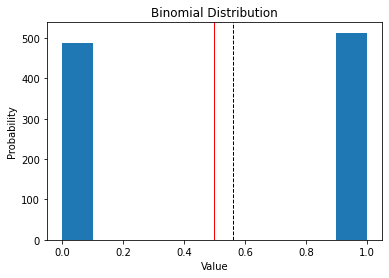

In [ ]:

# Set the number of samples
n = 1000

# Set the probability of success
p = 0.5

# Generate a binomial sample
sample_binomial = np.random.binomial(1, p, n)

# Calculate the sample mean
sample_mean = np.mean(np.random.choice(sample_binomial, 100))

# Calculate the theoretical mean
theoretical_mean = p

# Print the results
print('Sample Mean:', sample_mean)
print('Theoretical Mean:', theoretical_mean)

# Plot a histogram of the sample
plt.hist(sample_binomial)

# Add vertical lines to mark the sample mean and theoretical mean
plt.axvline(sample_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(theoretical_mean, color='r', linestyle='solid', linewidth=1)

# Label the plot
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

# Customer Data
Now lets think about how some of our customer data is generated.
What are the various types of data present?  How does that change the type of model you use to evaluate a population?

In [ ]:
# customer data
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/customers.csv'
customer_df = pd.read_csv(url, index_col=0)

# transactiondata
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/transactions.csv'
transaction_df = pd.read_csv(url, index_col=0)

# product data
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/products.csv'
product_df = pd.read_csv(url, index_col=0)

# Univariate and Bivariate Analysis

In this section, we will cover the basics of univariate and bivariate analysis. Univariate analysis is the analysis of a single variable, while bivariate analysis is the analysis of two variables to understand their relationship. We will go through a brief explanation of each, followed by coded examples demonstrating key principles.

# Measures of Variance and Standard Deviation
Measures of variance, such as standard deviation, describe the spread or dispersion of data within a distribution. In a normal distribution, standard deviation plays a crucial role in determining the proportion of values that lie within specific ranges.

The normal distribution, also known as the Gaussian distribution, is a bell-shaped curve that is symmetrical around the mean. In a normal distribution, the mean, median, and mode are equal. The standard deviation (σ) determines the spread of the distribution.

For a normal distribution:

About 68% of the values lie within one standard deviation (±1σ) from the mean (μ).
About 95% of the values lie within two standard deviations (±2σ) from the mean (μ).
About 99.7% of the values lie within three standard deviations (±3σ) from the mean (μ).
Let's visualize this relationship through a coding example.

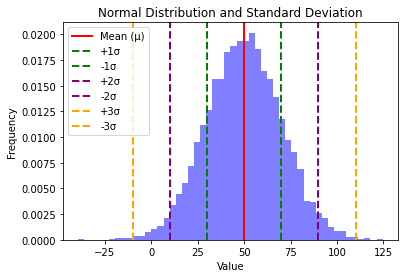

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a normal distribution with a mean and standard deviation
mean = 50
std_dev = 20
num_samples = 10000
data = np.random.normal(mean, std_dev, num_samples)

# Plot the histogram and add vertical lines for standard deviations
plt.hist(data, bins=50, alpha=0.5, color='blue', density=True)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label='Mean (μ)')
plt.axvline(mean + std_dev, color='green', linestyle='--', linewidth=2, label='+1σ')
plt.axvline(mean - std_dev, color='green', linestyle='--', linewidth=2, label='-1σ')
plt.axvline(mean + 2 * std_dev, color='purple', linestyle='--', linewidth=2, label='+2σ')
plt.axvline(mean - 2 * std_dev, color='purple', linestyle='--', linewidth=2, label='-2σ')
plt.axvline(mean + 3 * std_dev, color='orange', linestyle='--', linewidth=2, label='+3σ')
plt.axvline(mean - 3 * std_dev, color='orange', linestyle='--', linewidth=2, label='-3σ')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution and Standard Deviation')
plt.show()


In this example, we generated a normal distribution with a mean of 0 and a standard deviation of 1. The vertical lines show the mean and standard deviations from the mean. As expected, most of the values are concentrated within the first standard deviation (±1σ) from the mean.

Understanding the relationship between standard deviation and the normal distribution is crucial for interpreting and analyzing data. It allows us to estimate the probability of certain values occurring and helps in making informed decisions based on the distribution of the data.





# Univariate Analysis
Univariate analysis involves examining a single variable to understand its distribution, central tendency, and dispersion. Some common techniques used in univariate analysis include histograms, box plots, and probability density functions.

Let's create a histogram and a box plot for a dataset using Python

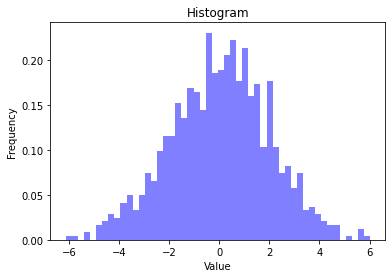

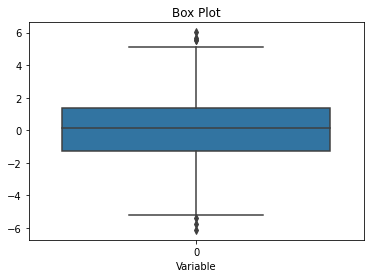

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate a normal distribution
mu = 0
sigma = 2
num_samples = 1000
data = np.random.normal(mu, sigma, num_samples)

# Plot a histogram
plt.hist(data, bins=50, alpha=0.5, color='blue', density=True)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot
sns.boxplot(data)
plt.title('Box Plot')
plt.xlabel('Variable')
plt.show()


# Percentiles and Binning Methods for Skewed Data
When data is skewed, it is not symmetrically distributed around the mean, and standard measures of central tendency such as the mean or standard deviation might not accurately describe the data. In these cases, percentiles and binning methods can be helpful for quantifying and analyzing skewed data.

Percentiles
Percentiles are a measure of relative standing that indicates the percentage of data points below a specific value. For example, the 25th percentile (also known as the first quartile) is the value below which 25% of the data points fall. Percentiles are particularly useful for understanding the distribution of skewed data, as they are less sensitive to extreme values.

To calculate percentiles in Python, we can use the numpy.percentile() function:

In [ ]:
import numpy as np

# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Calculate percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p95 = np.percentile(data, 95)

print(f'25th percentile: {p25:.2f}')
print(f'50th percentile (median): {p50:.2f}')
print(f'95th percentile: {p95:.2f}')


25th percentile: 0.30
50th percentile (median): 0.70
95th percentile: 2.97


(array([538., 273., 103.,  47.,  24.,  10.,   3.,   0.,   1.,   1.]),
 array([7.65058905e-04, 7.96313336e-01, 1.59186161e+00, 2.38740989e+00,
        3.18295817e+00, 3.97850645e+00, 4.77405472e+00, 5.56960300e+00,
        6.36515128e+00, 7.16069955e+00, 7.95624783e+00]),
 <BarContainer object of 10 artists>)

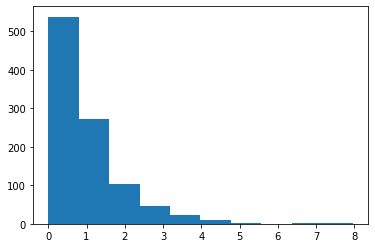

In [ ]:
plt.hist(data)

# Binning Methods
Binning methods involve dividing the data into intervals (bins) and counting the number of data points that fall into each bin. This helps to visualize and analyze the distribution of skewed data.

Histograms and box plots are two common binning methods for skewed data:

Histogram: A histogram is a bar chart that represents the frequency distribution of a dataset. The data is divided into a set of intervals (bins), and the height of each bar corresponds to the number of data points within that interval.

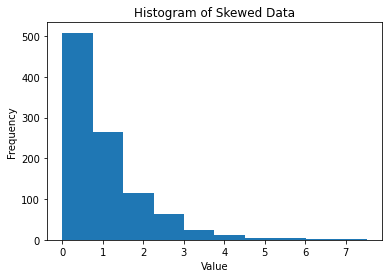

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Create a histogram
plt.hist(data, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Skewed Data')
plt.show()


# Box Plot: 
A box plot is a graphical representation of the distribution of a dataset based on quartiles. It displays the median, first quartile (Q1), and third quartile (Q3) as a box, with whiskers extending to the minimum and maximum values within 1.5 times the interquartile range (IQR). Outliers are represented as individual points outside the whiskers.

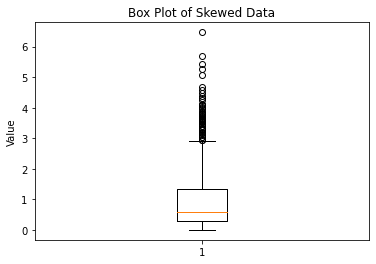

In [ ]:
# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Create a box plot
plt.boxplot(data)
plt.ylabel('Value')
plt.title('Box Plot of Skewed Data')
plt.show()


By using percentiles and binning methods like histograms and box plots, you can effectively analyze and quantify skewed data, providing better insights into the underlying distribution and potential outliers.

# Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables. Some common techniques used in bivariate analysis include scatter plots, correlation coefficients, and cross-tabulation.

Let's create a scatter plot and compute the correlation coefficient for two variables using Python.

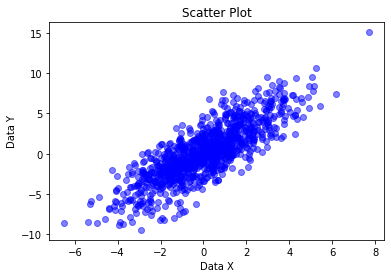

Correlation Coefficient: 0.82


In [ ]:
# Generate two correlated datasets
np.random.seed(42)
data_x = np.random.normal(0, 2, 1000)
data_y = data_x * 1.5 + np.random.normal(0, 2, 1000)

# Plot a scatter plot
plt.scatter(data_x, data_y, alpha=0.5, color='blue')
plt.title('Scatter Plot')
plt.xlabel('Data X')
plt.ylabel('Data Y')
plt.show()

# Compute the correlation coefficient
correlation = np.corrcoef(data_x, data_y)[0, 1]
print(f'Correlation Coefficient: {correlation:.2f}')

In [ ]:
# Create a sample dataset
data = {
    'Gender': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M'],
    'Product': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B']
}

df = pd.DataFrame(data)

# Cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Product'])
print('Cross-tabulation:')
print(cross_tab)


Cross-tabulation:
Product  A  B
Gender       
F        3  2
M        2  3


In this section, you have learned about univariate and bivariate analysis. You should now be able to perform basic analyses on single variables as well as understand the relationships between two variables.

Question
Given two datasets data_a and data_b, write code to create a scatter plot, compute the correlation coefficient, and perform cross-tabulation if the data is categorical.

# Harmonic, Geometric, and Arithmetic Means
The harmonic, geometric, and arithmetic means are different ways of calculating the average of a set of numbers. Each mean is appropriate for different types of data or situations. Let's briefly describe each mean and then illustrate their differences through a coding example.

## Arithmetic Mean: 
The arithmetic mean is the most common type of mean. It is calculated by summing all the numbers in a dataset and dividing by the count of the numbers. The arithmetic mean is appropriate for situations where the data is evenly distributed and does not have extreme values.

## Geometric Mean: 
The geometric mean is calculated by multiplying all the numbers in a dataset and then taking the nth root, where n is the count of the numbers. The geometric mean is appropriate for situations where the data is not evenly distributed or has a multiplicative relationship, for example exponential distributions.

## Harmonic Mean: 
The harmonic mean is calculated by taking the reciprocal of the arithmetic mean of the reciprocals of the numbers in a dataset. The harmonic mean is appropriate for situations where the data has a harmonic or reciprocal relationship, such as rates or ratios.

Now, let's create a coding example to demonstrate the differences between harmonic, geometric, and arithmetic means.

In [ ]:
import numpy as np
from scipy.stats import hmean, gmean

# Create a dataset
data = np.array([1, 2, 4, 8, 12, 14])
ratio = np.array([1/4, 1/2, 1/4, 1/6, 1/8, 1/12, 1/3])

# Calculate the arithmetic mean
arithmetic_mean = np.mean(ratio)
print(f'Arithmetic Mean: {arithmetic_mean:.2f}')

# Calculate the geometric mean
geometric_mean = gmean(ratio)
print(f'Geometric Mean: {geometric_mean:.2f}')

# Calculate the harmonic mean
harmonic_mean = hmean(ratio)
print(f'Harmonic Mean: {harmonic_mean:.2f}')


Arithmetic Mean: 0.24
Geometric Mean: 0.21
Harmonic Mean: 0.18


In this example, we used a dataset with an exponential growth pattern. As expected, the arithmetic mean is the largest, followed by the geometric mean, and finally the harmonic mean, which is the smallest. The geometric mean is a more appropriate measure of central tendency for this dataset due to its multiplicative relationship.

Remember to choose the appropriate mean based on the characteristics of your dataset and the relationships between the data points.

# Continuous vs. Discrete Data
Continuous and discrete data are two types of data that require different methods for summarization and analysis. Continuous data can take any value within a specific range, while discrete data can only take distinct or separate values. Using incorrect methods for summarization may lead to incorrect interpretations of the data. Let's explore these differences through examples.

Continuous Data
Continuous data can take any value within a range, and it often involves measurements or quantities, such as height, weight, or temperature. When analyzing continuous data, we typically use methods that account for the continuous nature of the data, such as histograms, probability density functions, and measures of central tendency like the mean or median.

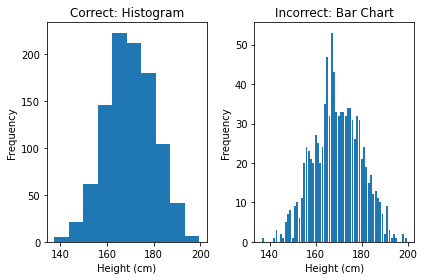

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate continuous data (heights in centimeters)
heights = np.random.normal(170, 10, 1000)

# Correct method: Using a histogram
plt.subplot(1, 2, 1)
plt.hist(heights, bins=10)
plt.title('Correct: Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Incorrect method: Using a bar chart
unique_heights, counts = np.unique(heights.astype(int), return_counts=True)
plt.subplot(1, 2, 2)
plt.bar(unique_heights, counts)
plt.title('Incorrect: Bar Chart')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In this example, using a histogram is the correct method for visualizing the continuous data (heights), while using a bar chart leads to an incorrect representation of the data.

Discrete Data
Discrete data can only take distinct or separate values, and it often involves counts or categories, such as the number of siblings or the type of pets owned. When analyzing discrete data, we typically use methods that account for the discrete nature of the data, such as bar charts, pie charts, and measures of central tendency like the mode.

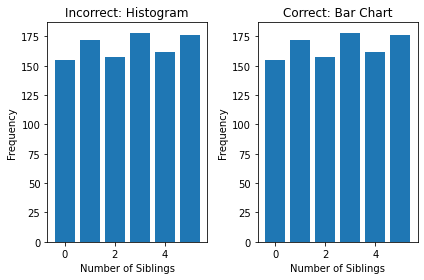

In [ ]:
# Generate discrete data (number of siblings)
siblings = np.random.randint(0, 6, 1000)

# Incorrect method: Using a histogram
plt.subplot(1, 2, 1)
plt.hist(siblings, bins=np.arange(-0.5, 6.5, 1), rwidth=0.8)
plt.title('Incorrect: Histogram')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')

# Correct method: Using a bar chart
plt.subplot(1, 2, 2)
plt.bar(np.unique(siblings), np.bincount(siblings))
plt.title('Correct: Bar Chart')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Statistical Inference: Point Estimates and Confidence Intervals
Statistical inference is the process of drawing conclusions about a population based on a sample from that population. In this context, we often use point estimates and confidence intervals to make inferences about population parameters.

# Point Estimates
A point estimate is a single value that serves as our best guess for the true value of a population parameter. Common point estimates include the sample mean (for estimating the population mean) and the sample proportion (for estimating the population proportion).

However, point estimates are subject to sampling variance, which means that different samples from the same population might produce different point estimates. Sampling variance arises because a sample is only a subset of the population, and it might not perfectly represent the entire population.

# Confidence Intervals
To account for sampling variance, we use confidence intervals. A confidence interval is a range of values within which we believe the true population parameter is likely to fall, with a certain level of confidence. The level of confidence, often expressed as a percentage (e.g., 95%), represents the probability that the confidence interval will contain the population parameter if the sampling process were repeated many times.

A confidence interval consists of two parts:

The point estimate (e.g., sample mean or sample proportion)
The margin of error, which depends on the desired level of confidence and the sampling variability (usually represented by the standard error)
Calculating a confidence interval involves using the point estimate and adding/subtracting the margin of error. For example, for a 95% confidence interval for a population mean, we would calculate it as follows:

In [ ]:
import numpy as np

# Generate a sample from a population
population = np.random.normal(50, 5, 10000)
sample = np.random.choice(population, size=100)

# Calculate the point estimate (sample mean)
point_estimate = np.mean(sample)

# Calculate the standard error
standard_error = np.std(sample, ddof=1) / np.sqrt(len(sample))

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
confidence_interval = (point_estimate - margin_of_error, point_estimate + margin_of_error)

print(f'Point Estimate: {point_estimate:.2f}')
print(f'95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})')


Point Estimate: 49.98
95% Confidence Interval: (49.10, 50.85)



In this example, we generated a sample from a population and calculated the point estimate (sample mean) and the 95% confidence interval for the population mean. The confidence interval provides a range of values that likely contains the true population mean with a 95% level of confidence.

Understanding the difference between point estimates and confidence intervals is crucial in statistical inference, as it allows you to make more informed decisions and account for sampling variance when drawing conclusions about a population based on a sample.

# Bootstrapped Confidence Intervals
Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly resampling from the original sample with replacement. Bootstrapped confidence intervals are an alternative to traditional parametric confidence intervals and can be particularly useful when the underlying distribution is not known or not normally distributed.

# Bootstrapped confidence intervals follow these steps:

Draw a random sample of size n from the original sample with replacement (called a bootstrap sample).
Calculate the statistic of interest (e.g., mean, median, proportion) for the bootstrap sample.
Repeat steps 1 and 2 a large number of times (e.g., 1000 or 10000) to generate a distribution of the statistic of interest.
Calculate the confidence interval based on the desired level of confidence (e.g., 95%) using the distribution of the statistic obtained in step 3.
Let's demonstrate how to create bootstrapped confidence intervals using Python

In [ ]:
import numpy as np

def bootstrap(sample, statistic, num_iterations=1000, ci=95):
    """
    Calculate bootstrapped confidence interval for a given sample and statistic.
    
    Args:
        sample (array-like): The original sample data.
        statistic (function): The statistic function to apply on each bootstrap sample.
        num_iterations (int): The number of bootstrap iterations.
        ci (float): The desired confidence level (in percentage).

    Returns:
        tuple: Lower and upper bounds of the bootstrapped confidence interval.
    """
    bootstrap_samples = np.random.choice(sample, size=(num_iterations, len(sample)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Generate a sample from a population
population = np.random.normal(50, 5, 10000)
sample = np.random.choice(population, size=100)

# Calculate bootstrapped 95% confidence interval for the mean
ci_lower, ci_upper = bootstrap(sample, np.mean, num_iterations=1000, ci=95)

print(f'Bootstrapped 95% Confidence Interval for the Mean: ({ci_lower:.2f}, {ci_upper:.2f})')


Bootstrapped 95% Confidence Interval for the Mean: (49.22, 52.12)


In this example, we generated a sample from a population and calculated a bootstrapped 95% confidence interval for the population mean. The bootstrap function takes the original sample, the statistic of interest, the number of bootstrap iterations, and the desired confidence level as input and returns the bootstrapped confidence interval.

Bootstrapped confidence intervals can be a powerful tool for statistical inference, especially when the underlying distribution is not known or not normally distributed, as they make fewer assumptions about the data and rely on the empirical distribution of the sample.

# Inferential Statistical Models

# Statistical Inference: Degree of Models/Assumptions
When performing statistical inference, we often have to make assumptions about the underlying distribution of the data or the relationships between variables. The degree of assumptions we make varies depending on the model or method we choose. In general, there are three classes of models based on their assumptions: fully parametric, non-parametric, and semi-parametric.

# Fully Parametric Models
Fully parametric models assume that the data follow a specific distribution, such as the normal distribution, and that the relationships between variables can be described by a set of parameters. Examples of fully parametric models include linear regression, logistic regression, and analysis of variance (ANOVA).

# Example: Linear Regression

In linear regression, we assume that the relationship between the response variable (Y) and the predictor variable(s) (X) can be described by a linear function, and that the errors are normally distributed with constant variance.

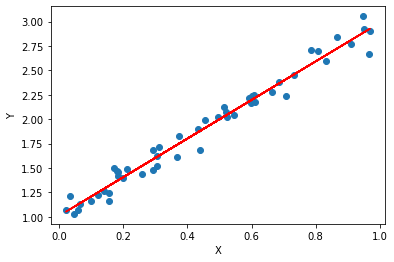

In [ ]:
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50)
Y = 2 * X + 1 + np.random.normal(0, 0.1, 50)

# Fit a linear regression model
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

# Predict and plot
predictions = model.predict(X.reshape(-1, 1))
plt.scatter(X, Y)
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Non-Parametric Models
Non-parametric models do not make any assumptions about the underlying distribution of the data or the functional form of the relationships between variables. They are more flexible than parametric models and can adapt to a wide range of data patterns. Examples of non-parametric models include k-nearest neighbors, kernel density estimation, and decision trees.

# Example: k-Nearest Neighbors

In k-nearest neighbors (k-NN) classification, we predict the class of a new data point based on the majority class of its k-nearest neighbors in the training data.

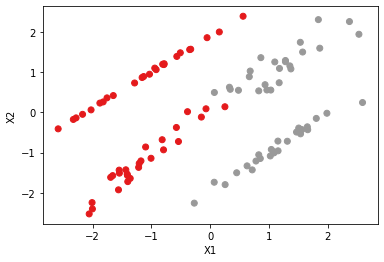

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict and plot
predictions = knn.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=plt.cm.Set1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Semi-Parametric Models
Semi-parametric models make some assumptions about the data or relationships between variables but are more flexible than fully parametric models. They combine parametric and non-parametric techniques to strike a balance between the simplicity of parametric models and the flexibility of non-parametric models. Examples of semi-parametric models include generalized additive models (GAMs) and Cox proportional hazards models.

# Example: Generalized Additive Model (GAM)

In generalized additive models, we assume that the relationship between the response variable (Y) and the predictor variable(s) (X) can be described by a sum of smooth functions, allowing for more flexibility than linear regression.

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


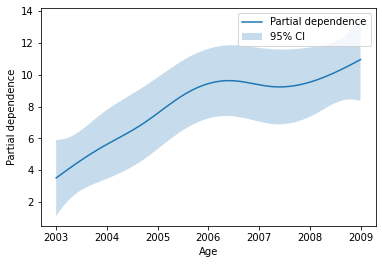

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM
from pygam.datasets import wage

# Load the wage dataset
X, y = wage()

# Fit a GAM with a spline term for the first predictor variable (age)
gam = LinearGAM(n_splines=10).gridsearch(X, y)

# Generate a grid of values for the predictor variable (age)
X_grid = gam.generate_X_grid(term=0)

# Calculate the partial dependence and confidence intervals
partial_dep, confidence_intervals = gam.partial_dependence(term=0, X=X_grid, width=0.95)

# Plot the partial dependence of the response variable on the first predictor variable
plt.figure()
plt.plot(X_grid[:, 0], partial_dep, label="Partial dependence")
plt.fill_between(X_grid[:, 0], confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.25, label="95% CI")
plt.xlabel('Age')
plt.ylabel('Partial dependence')
plt.legend()
plt.show()


In this example, we used the pygam library to fit a generalized additive model (GAM) to the wage dataset, which contains information about people's wages and their characteristics. We included a spline term for the first predictor variable, allowing for a flexible, smooth relationship between the response variable (wage) and the predictor variable. The plot shows the partial dependence of the wage on the first predictor variable.

In summary, fully parametric models make strong assumptions about the data and the relationships between variables, non-parametric models make few or no assumptions, and semi-parametric models strike a balance between the two. The choice of model depends on the specific problem, the data at hand, and the desired balance between simplicity and flexibility.

# Statistical Testing

# Type I and Type II Errors

When performing a statistical hypothesis test, there are two types of errors that can occur: Type I errors and Type II errors.

A Type I error occurs when we reject the null hypothesis even though it is actually true. This means that we have falsely concluded that there is a significant difference or relationship when there really isn't one. The probability of making a Type I error is denoted by the symbol alpha (α), and is usually set at 0.05 or 0.01, depending on the level of significance desired.

A Type II error occurs when we fail to reject the null hypothesis even though it is actually false. This means that we have failed to detect a significant difference or relationship when there really is one. The probability of making a Type II error is denoted by the symbol beta (β), and is influenced by the sample size, effect size, and level of significance.

The relationship between Type I and Type II errors can be visualized using a power curve, which shows the probability of correctly rejecting the null hypothesis (power) as a function of the effect size and sample size. As the effect size or sample size increases, the power of the test increases, and the probability of making a Type II error decreases. However, increasing the sample size or effect size also increases the probability of making a Type I error.

In general, the trade-off between Type I and Type II errors depends on the context and the consequences of each type of error. For example, in medical testing, a Type I error (false positive) can lead to unnecessary treatment or surgery, while a Type II error (false negative) can lead to a missed diagnosis or delayed treatment. Therefore, it is important to carefully consider the level of significance and the consequences of each type of error when designing and interpreting a statistical hypothesis test.

In summary, Type I and Type II errors are important concepts to understand when performing statistical hypothesis testing. Type I errors occur when we falsely reject the null hypothesis, while Type II errors occur when we fail to reject the null hypothesis when it is actually false. The trade-off between these two types of errors depends on the context and the consequences of each type of error.

## Using tests correctly

## Sample size determination: 
Sample size is an important consideration in statistical testing because it affects the power of the test and the precision of the estimates. A sample size that is too small may not be representative of the population and may lead to inaccurate results, while a sample size that is too large may be wasteful and unnecessary. Determining the appropriate sample size requires a balance between these factors and depends on the context of the study.

## Assumptions of the statistical test:
 Many statistical tests have specific assumptions that must be met in order for the test to be valid. These assumptions include things like normality of the data, equal variances, independence of observations, and linearity of relationships. Violating these assumptions can lead to inaccurate results and incorrect conclusions.

## Choosing the appropriate statistical test: 
There are many different statistical tests available, each with its own strengths and weaknesses. Choosing the appropriate test requires consideration of the study design, the research question, and the data being analyzed. Using the wrong test can lead to inaccurate results and incorrect conclusions.

## Interpreting the results of the statistical test: 
Finally, it is important to understand how to interpret the results of the statistical test in the context of the research question. This involves understanding the meaning of statistical significance, effect sizes, confidence intervals, and other measures of uncertainty. Misinterpreting the results of a statistical test can lead to incorrect conclusions and inappropriate actions.

In summary, correctly using statistical tests requires consideration of sample size determination, assumptions of the test, choosing the appropriate test, and interpreting the results. Understanding these foundational topics is essential for conducting valid and reliable statistical analyses.

# Power Analysis

Power analysis is a statistical technique used to determine the sample size needed for a statistical test to detect a significant effect, given a certain level of significance and effect size. It helps to ensure that the test has sufficient power to detect a significant effect if one exists, and to avoid unnecessary or underpowered studies.

The power of a statistical test is the probability of correctly rejecting the null hypothesis when it is actually false. It is influenced by several factors, including the sample size, level of significance, effect size, and variability of the data. A power analysis can be used to determine the sample size needed to achieve a desired level of power, given the other factors.

Here's an example visualization of a power analysis:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Set the parameters for the power analysis
effect_sizes = np.arange(0.2, 2.2, 0.2)
sample_sizes = np.arange(10, 210, 10)
alpha = 0.05
power = 0.8

# Initialize the TTestIndPower object
power_analysis = TTestIndPower()

# Calculate the power for different effect sizes and sample sizes
powers = []
for effect_size in effect_sizes:
    power_row = []
    for sample_size in sample_sizes:
        power_val = power_analysis.solve_power(None, effect_size, sample_size, alpha, power)
        power_row.append(power_val)
    powers.append(power_row)

# Convert the power values to a numpy array for plotting
powers = np.array(powers)

# Create a heatmap of the power values
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(powers, cmap='YlGnBu', annot=True, xticklabels=sample_sizes, yticklabels=effect_sizes, fmt='.2f', cbar_kws={'label': 'Power'})
ax.set_xlabel('Sample Size')
ax.set_ylabel('Effect Size (Cohen\'s d)')
ax.set_title(f'Power Analysis (alpha={alpha}, power={power})')
plt.show()


# Chi squared goodness of fit
The chi-squared goodness of fit test is a statistical test used to determine whether a sample of categorical data fits a theoretical distribution. It is used to compare one variable to a theoretical distribution when the form of the data is a frequency. The test is used to determine whether the observed data differs significantly from what would be expected under the null hypothesis, which is that the sample comes from a population with the specified theoretical distribution.

The test involves calculating a test statistic called the chi-squared statistic, which measures the difference between the observed and expected frequencies. The expected frequencies are calculated based on the theoretical distribution being tested. If the chi-squared statistic is large enough, it indicates that the observed data differs significantly from what would be expected under the null hypothesis, and the null hypothesis is rejected.

Here's an example Python code that demonstrates how to perform a chi-squared goodness of fit test:

Chi-squared statistic: 28.602356902356895
p-value: 9.41460263006302e-06


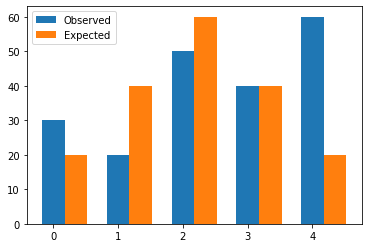

In [9]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Generate some categorical data with random frequencies
data = np.array([30, 20, 50, 40, 60])

# Define the theoretical distribution to test against (normal distribution)
theoretical_dist = np.array([0.1, 0.2, 0.3, 0.2, 0.1])

# Calculate the expected frequencies based on the theoretical distribution
expected_freq = theoretical_dist * data.sum()

# Perform the chi-squared goodness of fit test
chi2, pval = chi2_contingency([data, expected_freq])[0:2]

# Print the test results
print('Chi-squared statistic:', chi2)
print('p-value:', pval)

# Visualize the observed and expected frequencies
fig, ax = plt.subplots()
x = np.arange(len(data))
ax.bar(x, data, width=0.35, label='Observed')
ax.bar(x+0.35, expected_freq, width=0.35, label='Expected')
ax.legend()
plt.show()


## Chi-squared test for association

The chi-squared test for association is a statistical test used to determine whether there is a relationship between two categorical variables. It is used to test whether the observed frequencies in a contingency table are significantly different from what would be expected under the null hypothesis, which is that the two variables are independent.

The test involves calculating a test statistic called the chi-squared statistic, which measures the difference between the observed frequencies and the expected frequencies under the null hypothesis. The expected frequencies are calculated based on the assumption that the two variables are independent. If the chi-squared statistic is large enough, it indicates that the observed data differs significantly from what would be expected under the null hypothesis, and the null hypothesis is rejected.

Here's an example Python code that demonstrates how to perform a chi-squared test for association:

In [10]:
import numpy as np
from scipy.stats import chi2_contingency

# Generate some categorical data with random frequencies
data = np.array([[20, 30, 50], [40, 60, 80], [10, 20, 30]])

# Perform the chi-squared test for association
chi2, pval, dof, expected_freq = chi2_contingency(data)

# Print the test results
print('Chi-squared statistic:', chi2)
print('p-value:', pval)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected_freq)


Chi-squared statistic: 1.4963924963924955
p-value: 0.8272802986281522
Degrees of freedom: 4
Expected frequencies: [[20.58823529 32.35294118 47.05882353]
 [37.05882353 58.23529412 84.70588235]
 [12.35294118 19.41176471 28.23529412]]


In this example, we have generated a contingency table with some categorical data, and we want to test whether there is a relationship between the two variables. We perform the chi-squared test for association using the chi2_contingency function from the SciPy library. This function returns the chi-squared statistic, p-value, degrees of freedom, and expected frequencies for the test. We print these results to see whether there is a significant relationship between the two variables.

The chi-squared test for association can also be visualized using a heatmap to show the observed and expected frequencies. Here's an example Python code that demonstrates how to create a heatmap:

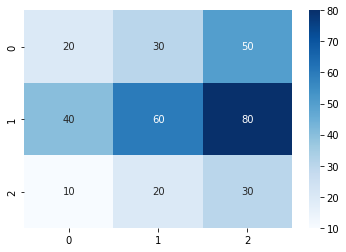

In [11]:
import seaborn as sns

# Create a heatmap of the contingency table
sns.heatmap(data, annot=True, cmap='Blues')
plt.show()


In this code, we use the heatmap function from the Seaborn library to create a heatmap of the contingency table. The annot parameter is set to True to display the observed frequencies, and the cmap parameter is set to 'Blues' to use a blue color scheme. The resulting heatmap helps to visualize the relationship between the two variables and whether there are any significant deviations from what would be expected under the null hypothesis.

## Spearman's rank correlation coefficient

Spearman's rank correlation coefficient is a statistical test used to measure the strength and direction of a relationship between two variables. Unlike Pearson's correlation coefficient, which measures the strength of a linear relationship between two continuous variables, Spearman's rank correlation coefficient measures the strength of a monotonic relationship between two variables, which may be continuous or discrete.

The test involves ranking the values of each variable and calculating the difference between the ranks for each pair of observations. The test statistic is then calculated as the correlation between the ranks. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative relationship, 0 indicates no relationship, and 1 indicates a perfect positive relationship.

Here's an example Python code that demonstrates how to calculate Spearman's rank correlation coefficient:

Spearman correlation coefficient: 0.922112211221122
p-value: 3.3638101948597485e-42


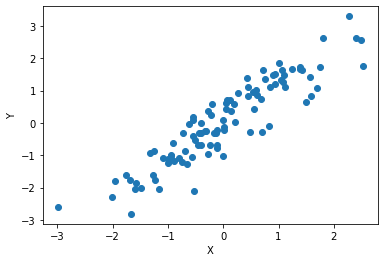

In [12]:
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Generate some random data with a monotonic relationship
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 0.5, 100)

# Calculate Spearman's rank correlation coefficient
rho, pval = spearmanr(x, y)

# Print the correlation coefficient and p-value
print('Spearman correlation coefficient:', rho)
print('p-value:', pval)

# Visualize the relationship between the two variables
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


In this example, we have generated some random data with a monotonic relationship, where the values of y increase with the values of x. We calculate Spearman's rank correlation coefficient using the spearmanr function from the SciPy library. This function returns the correlation coefficient and p-value for the test. We print these results to see the strength and direction of the relationship between the two variables.

Finally, we visualize the relationship between the two variables using a scatter plot. The scatter plot helps to demonstrate the underlying mechanism of Spearman's rank correlation coefficient, which is to measure the strength of a monotonic relationship between two variables.

If the correlation coefficient is close to -1 or 1, it indicates a strong monotonic relationship between the two variables. If the correlation coefficient is close to 0, it indicates no monotonic relationship between the two variables.

# Multiple regression

Multiple regression is a statistical test used to analyze the relationship between a dependent variable and two or more independent variables. It is used to model the relationship between the dependent variable and the independent variables, and to identify which independent variables have a significant impact on the dependent variable. The model is typically represented as:

y = b0 + b1x1 + b2x2 + ... + bnxn + e

where y is the dependent variable, x1, x2, ..., xn are the independent variables, b0, b1, b2, ..., bn are the coefficients of the independent variables, and e is the error term.

The coefficients of the independent variables represent the change in the dependent variable for each unit change in the independent variable, holding all other independent variables constant. The coefficients can be used to make predictions about the dependent variable based on the values of the independent variables.

Here's an example Python code that demonstrates how to perform multiple regression:

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some random data with two independent variables and one dependent variable
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2*x1 - 3*x2 + np.random.normal(0, 1, 100)

# Create a pandas dataframe with the data
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Fit a multiple regression model
model = sm.formula.ols('y ~ x1 + x2', data=data).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     446.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.17e-49
Time:                        15:45:12   Log-Likelihood:                -149.16
No. Observations:                 100   AIC:                             304.3
Df Residuals:                      97   BIC:                             312.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3198      0.109     -2.923      0.0

In this example, we have generated some random data with two independent variables (x1 and x2) and one dependent variable (y), where the values of y depend on the values of x1 and x2. We create a pandas dataframe with the data and fit a multiple regression model using the ols function from the statsmodels library.

The ols function takes a formula as input, which specifies the dependent variable and independent variables to include in the model. The formula uses a syntax similar to R, where y ~ x1 + x2 specifies that y is the dependent variable and x1 and x2 are the independent variables.

We then print the summary of the model using the summary method. The model summary includes information about the coefficients of the independent variables, the R-squared value (which measures the proportion of variance in the dependent variable explained by the independent variables), and other statistics.

The coefficients of the independent variables indicate the change in the dependent variable for each unit change in the independent variable, holding all other independent variables constant. In this example, the coefficient for x1 is 2, indicating that a one-unit increase in x1 is associated with a two-unit increase in y, holding x2 constant. The coefficient for x2 is -3, indicating that a one-unit increase in x2 is associated with a three-unit decrease in y, holding x1 constant.

# Independent samples t-test

The independent samples t-test is a statistical test used to compare the means of two independent groups. It is used to determine whether there is a significant difference between the means of the two groups, and to estimate the size of the difference. The test assumes that the two groups are normally distributed and have equal variances.

The test involves calculating a test statistic called the t-statistic, which measures the difference between the means of the two groups relative to the variability within each group. The test statistic is then compared to a t-distribution with a certain number of degrees of freedom, which depends on the sample sizes and the assumed equality of variances. If the t-statistic is large enough, it indicates that the difference between the means of the two groups is significant, and the null hypothesis of equal means is rejected.

Here's an example Python code that demonstrates how to perform an independent samples t-test:

t-statistic: -4.421382386266779
p-value: 2.5386399745228395e-05


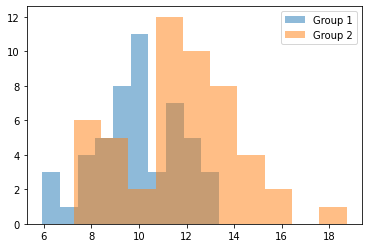

In [14]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Generate some random data for two independent groups
group1 = np.random.normal(10, 2, 50)
group2 = np.random.normal(12, 2, 50)

# Perform an independent samples t-test
t, pval = ttest_ind(group1, group2)

# Print the test results
print('t-statistic:', t)
print('p-value:', pval)

# Visualize the data for the two groups
fig, ax = plt.subplots()
ax.hist(group1, alpha=0.5, label='Group 1')
ax.hist(group2, alpha=0.5, label='Group 2')
ax.legend()
plt.show()


In this example, we have generated some random data for two independent groups (group1 and group2) with different means and equal variances. We perform an independent samples t-test using the ttest_ind function from the SciPy library. This function returns the t-statistic and p-value for the test. We print these results to see whether there is a significant difference between the means of the two groups.

Finally, we visualize the data for the two groups using a histogram to see how the distributions compare. The visualization helps to demonstrate the underlying mechanism of the independent samples t-test, which is to compare the means of the two groups and estimate the size of the difference.

If the p-value is less than the significance level (usually set at 0.05), it indicates that the difference between the means of the two groups is significant, and the null hypothesis of equal means is rejected. If the p-value is greater than the significance level, it indicates that the difference between the means of the two groups is not significant, and the null hypothesis cannot be rejected.

# Paired samples t-test

The paired samples t-test is a statistical test used to compare the means of two related groups. It is used to determine whether there is a significant difference between the means of the two groups, and to estimate the size of the difference. The test assumes that the two groups are paired and have equal variances.

The test involves calculating a test statistic called the t-statistic, which measures the difference between the means of the two groups relative to the variability within each group. The test statistic is then compared to a t-distribution with a certain number of degrees of freedom, which depends on the sample size and the assumed equality of variances. If the t-statistic is large enough, it indicates that the difference between the means of the two groups is significant, and the null hypothesis of equal means is rejected.

Here's an example Python code that demonstrates how to perform a paired samples t-test:

In [15]:
import numpy as np
from scipy.stats import ttest_rel

# Generate some random data for two related groups
before = np.random.normal(10, 2, 50)
after = before + np.random.normal(2, 1, 50)

# Perform a paired samples t-test
t, pval = ttest_rel(before, after)

# Print the test results
print('t-statistic:', t)
print('p-value:', pval)


t-statistic: -14.154886987355859
p-value: 6.131789836087369e-19


In this example, we have generated some random data for two related groups (before and after), where the values of after are related to the values of before through the addition of some random noise. We perform a paired samples t-test using the ttest_rel function from the SciPy library. This function returns the t-statistic and p-value for the test. We print these results to see whether there is a significant difference between the means of the two groups.

If the p-value is less than the significance level (usually set at 0.05), it indicates that the difference between the means of the two groups is significant, and the null hypothesis of equal means is rejected. If the p-value is greater than the significance level, it indicates that the difference between the means of the two groups is not significant, and the null hypothesis cannot be rejected.

The paired samples t-test is useful when we want to compare the means of two related groups, such as before-and-after measurements in a clinical trial, or matched pairs of individuals. It helps to control for individual differences and reduce variability between the groups, leading to a more sensitive test.

# One-way ANOVA

One-way ANOVA (analysis of variance) is a statistical test used to compare the means of three or more independent groups. It is used to determine whether there is a significant difference between the means of the groups, and to estimate the size of the difference. The test assumes that the groups are independent and normally distributed with equal variances.

The test involves calculating a test statistic called the F-statistic, which measures the ratio of the between-group variability to the within-group variability. The F-statistic is then compared to an F-distribution with a certain number of degrees of freedom, which depend on the number of groups and the sample size. If the F-statistic is large enough, it indicates that the difference between the means of the groups is significant, and the null hypothesis of equal means is rejected.

Here's an example Python code that demonstrates how to perform a one-way ANOVA:

F-statistic: 81.84203868389132
p-value: 1.2953224374060466e-24


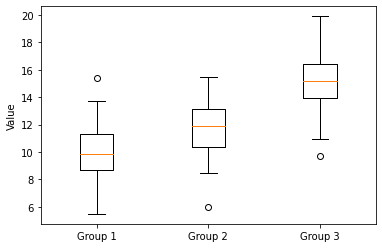

In [16]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Generate some random data for three independent groups
group1 = np.random.normal(10, 2, 50)
group2 = np.random.normal(12, 2, 50)
group3 = np.random.normal(15, 2, 50)

# Perform a one-way ANOVA
f, pval = f_oneway(group1, group2, group3)

# Print the test results
print('F-statistic:', f)
print('p-value:', pval)

# Visualize the data for the three groups
fig, ax = plt.subplots()
ax.boxplot([group1, group2, group3])
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])
ax.set_ylabel('Value')
plt.show()


In this example, we have generated some random data for three independent groups (group1, group2, and group3) with different means and equal variances. We perform a one-way ANOVA using the f_oneway function from the SciPy library. This function returns the F-statistic and p-value for the test. We print these results to see whether there is a significant difference between the means of the three groups.

Finally, we visualize the data for the three groups using a boxplot to see how the distributions compare. The visualization helps to demonstrate the underlying mechanism of the one-way ANOVA, which is to compare the means of the three groups and estimate the size of the difference.

If the p-value is less than the significance level (usually set at 0.05), it indicates that the difference between the means of the groups is significant, and the null hypothesis of equal means is rejected. If the p-value is greater than the significance level, it indicates that the difference between the means of the groups is not significant, and the null hypothesis cannot be rejected.

The one-way ANOVA is useful when we want to compare the means of three or more independent groups, such as different treatment groups in a clinical trial, or different groups of students in an educational study. It helps to identify which group(s) differ significantly from the others, and to estimate the size of the difference.

# Repeated measures ANOVA

Repeated measures ANOVA is a statistical test used to compare the means of three or more related groups. It is used to determine whether there is a significant difference between the means of the groups, and to estimate the size of the difference. The test assumes that the groups are related and normally distributed with equal variances.

The test involves calculating a test statistic called the F-statistic, which measures the ratio of the between-group variability to the within-group variability. The F-statistic is then compared to an F-distribution with a certain number of degrees of freedom, which depend on the number of groups and the sample size. If the F-statistic is large enough, it indicates that the difference between the means of the groups is significant, and the null hypothesis of equal means is rejected.

Here's an example Python code that demonstrates how to perform a repeated measures ANOVA:

F-statistic: 3.174171131641279
p-value: 5.122175658180228e-07


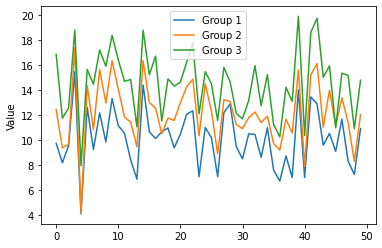

In [17]:
import numpy as np
from scipy.stats import f_oneway, f
import matplotlib.pyplot as plt

# Generate some random data for three related groups
group1 = np.random.normal(10, 2, 50)
group2 = group1 + np.random.normal(2, 1, 50)
group3 = group2 + np.random.normal(2, 1, 50)

# Reshape the data for repeated measures ANOVA
data = np.vstack((group1, group2, group3)).T

# Perform a repeated measures ANOVA
fval, pval = f_oneway(*data)

# Print the test results
print('F-statistic:', fval)
print('p-value:', pval)

# Visualize the data for the three groups
fig, ax = plt.subplots()
ax.plot(group1, label='Group 1')
ax.plot(group2, label='Group 2')
ax.plot(group3, label='Group 3')
ax.legend()
ax.set_ylabel('Value')
plt.show()


In this example, we have generated some random data for three related groups (group1, group2, and group3) where the values of group2 and group3 are related to the values of group1 through the addition of some random noise. We reshape the data into a format suitable for a repeated measures ANOVA and perform the test using the f_oneway function from the SciPy library. This function returns the F-statistic and p-value for the test. We print these results to see whether there is a significant difference between the means of the three groups.

Finally, we visualize the data for the three groups using a line plot to see how the means compare across the different groups. The visualization helps to demonstrate the underlying mechanism of the repeated measures ANOVA, which is to compare the means of the three groups and estimate the size of the difference.

If the p-value is less than the significance level (usually set at 0.05), it indicates that the difference between the means of the groups is significant, and the null hypothesis of equal means is rejected. If the p-value is greater than the significance level, it indicates that the difference between the means of the groups is not significant, and the null hypothesis cannot be rejected.

The repeated measures ANOVA is useful when we want to compare the means of three or more related groups, such as repeated measurements on the same subject or different conditions within the same experiment. It helps to control for individual differences and reduce variability between the groups, leading to a more sensitive test.

## Why can't I just use a ttest across each group?

Using an independent t-test across multiple groups is inappropriate for several reasons.

First, an independent t-test assumes that the groups are independent and have equal variances. However, when we have three or more groups, it is unlikely that they will all have equal variances, and violating this assumption can lead to inaccurate results.

Second, an independent t-test only compares the means of two groups at a time, and does not account for the variability between all groups simultaneously. This can lead to Type I errors (false positives) or Type II errors (false negatives) in detecting significant differences between groups.

Third, performing multiple independent t-tests increases the likelihood of making a Type I error due to multiple comparisons. This can lead to false positives, where significant differences are detected when they do not actually exist.

Instead of using an independent t-test across multiple groups, a better approach would be to use an ANOVA (analysis of variance) test. ANOVA is a statistical test that can compare the means of three or more groups simultaneously, taking into account the variability between all groups. ANOVA also allows us to test for interactions between variables and to control for confounding variables.

In summary, using an independent t-test across multiple groups is inappropriate because it violates key assumptions of the test, does not account for variability between all groups simultaneously, and increases the likelihood of making a Type I error due to multiple comparisons. Instead, ANOVA should be used to compare the means of three or more groups simultaneously.